In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = "/content/drive/MyDrive/JS Machine Learning/JS4/Artikel dan Dataset/dataBB2013.csv"
df = pd.read_csv(file_path)
display(df.head())

,hystologic_category_1NS_2NB_3GNB,INSS_Stage,INRG_risk_classification_0HR_1ILR,age_at_diagnosis_months,PFS_months,overall_survival_months,outcome_0DOD_1AICR_2AWD,MYCN_amplication,ferritin_ng/ml,Methylation_SFN_perce,Methylation_PCDHB_cluster_perce
0,1,4,0,59,21.10,44.07,0,0.0,57,78.55,30.56
1,2,4,0,34,NaN,74.70,1,0.0,77,49.30,30.65
2,2,4,0,55,NaN,86.83,1,0.0,101,76.90,35.48
3,1,4,0,81,25.93,45.20,0,0.0,330,90.43,36.49
4,1,4,0,63,NaN,72.27,1,0.0,135,76.65,37.15


In [3]:
df.info()
display(df.describe())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   hystologic_category_1NS_2NB_3GNB   121 non-null    int64  
 1   INSS_Stage                         121 non-null    int64  
 2   INRG_risk_classification_0HR_1ILR  121 non-null    int64  
 3   age_at_diagnosis_months            121 non-null    int64  
 4   PFS_months                         88 non-null     float64
 5   overall_survival_months            121 non-null    float64
 6   outcome_0DOD_1AICR_2AWD            121 non-null    int64  
 7   MYCN_amplication                   120 non-null    float64
 8   ferritin_ng/ml                     112 non-null    object 
 9   Methylation_SFN_perce              121 non-null    float64
 10  Methylation_PCDHB_cluster_perce    120 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 10.5+ KB


,hystologic_category_1NS_2NB_3GNB,INSS_Stage,INRG_risk_classification_0HR_1ILR,age_at_diagnosis_months,PFS_months,overall_survival_months,outcome_0DOD_1AICR_2AWD,MYCN_amplication,Methylation_SFN_perce,Methylation_PCDHB_cluster_perce
count,121.000000,121.0,121.000000,121.000000,88.000000,121.000000,121.000000,120.000000,121.000000,120.000000
mean,2.000000,4.0,0.123967,47.173554,22.387500,48.757273,0.305785,0.308333,85.042851,57.360750
std,0.387298,0.0,0.330914,35.003018,12.513058,35.371932,0.513858,0.463741,8.617030,14.594757
min,1.000000,4.0,0.000000,2.000000,3.700000,0.270000,0.000000,0.000000,36.600000,29.440000
25%,2.000000,4.0,0.000000,24.000000,15.082500,22.000000,0.000000,0.000000,82.500000,44.905000
50%,2.000000,4.0,0.000000,41.000000,21.435000,38.000000,0.000000,0.000000,87.000000,57.255000
75%,2.000000,4.0,0.000000,58.000000,28.042500,66.000000,1.000000,1.000000,90.550000,69.432500
max,3.000000,4.0,1.000000,196.000000,74.730000,164.470000,2.000000,1.000000,99.000000,88.930000


,0
hystologic_category_1NS_2NB_3GNB,0
INSS_Stage,0
INRG_risk_classification_0HR_1ILR,0
age_at_diagnosis_months,0
PFS_months,33
overall_survival_months,0
outcome_0DOD_1AICR_2AWD,0
MYCN_amplication,1
ferritin_ng/ml,9
Methylation_SFN_perce,0


In [4]:
# Step 1 & 2: Check for non-numeric values in 'ferritin_ng/ml', handle them, and convert to numeric
# Identify non-numeric values
non_numeric_ferritin = df[pd.to_numeric(df['ferritin_ng/ml'], errors='coerce').isna()]['ferritin_ng/ml'].unique()
print(f"Non-numeric values in 'ferritin_ng/ml': {non_numeric_ferritin}")

# Assuming non-numeric values are errors or placeholders, convert them to NaN
df['ferritin_ng/ml'] = pd.to_numeric(df['ferritin_ng/ml'], errors='coerce')

# Step 3: Handle missing values
# For simplicity and given the relatively small number of missing values,
# I will impute missing numerical values with the median and missing categorical values with the mode.
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Imputed missing values in '{col}' with median: {median_val}")
        else:
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Imputed missing values in '{col}' with mode: {mode_val}")

# Verify that there are no more missing values
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Step 4: Identify numeric columns for clustering
# Exclude potential identifier or target columns if any.
# Based on the data description, all columns except the first four and 'outcome_0DOD_1AICR_2AWD' seem suitable for clustering.
numeric_cols_for_clustering = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Exclude columns that are likely categorical or identifiers based on their names and descriptions
cols_to_exclude = ['hystologic_category_1NS_2NB_3GNB', 'INSS_Stage', 'INRG_risk_classification_0HR_1ILR', 'outcome_0DOD_1AICR_2AWD']
numeric_cols_for_clustering = [col for col in numeric_cols_for_clustering if col not in cols_to_exclude]

print(f"\nNumeric columns selected for clustering: {numeric_cols_for_clustering}")


# Step 5: Standardize the selected numeric columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numeric_cols_for_clustering] = scaler.fit_transform(df[numeric_cols_for_clustering])

display(df.head())
display(df.describe())

Non-numeric values in 'ferritin_ng/ml': [nan 'N.D.']
Imputed missing values in 'PFS_months' with median: 21.435
Imputed missing values in 'MYCN_amplication' with median: 0.0
Imputed missing values in 'ferritin_ng/ml' with median: 201.0
Imputed missing values in 'Methylation_PCDHB_cluster_perce' with median: 57.254999999999995

Missing values after imputation:
hystologic_category_1NS_2NB_3GNB     0
INSS_Stage                           0
INRG_risk_classification_0HR_1ILR    0
age_at_diagnosis_months              0
PFS_months                           0
overall_survival_months              0
outcome_0DOD_1AICR_2AWD              0
MYCN_amplication                     0
ferritin_ng/ml                       0
Methylation_SFN_perce                0
Methylation_PCDHB_cluster_perce      0
dtype: int64

Numeric columns selected for clustering: ['age_at_diagnosis_months', 'PFS_months', 'overall_survival_months', 'MYCN_amplication', 'ferritin_ng/ml', 'Methylation_SFN_perce', 'Methylation_PCDHB_clu

/tmp/ipython-input-4133995025.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)


,hystologic_category_1NS_2NB_3GNB,INSS_Stage,INRG_risk_classification_0HR_1ILR,age_at_diagnosis_months,PFS_months,overall_survival_months,outcome_0DOD_1AICR_2AWD,MYCN_amplication,ferritin_ng/ml,Methylation_SFN_perce,Methylation_PCDHB_cluster_perce
0,1,4,0,0.339274,-0.096783,-0.133065,0,-0.663684,-0.704784,-0.756624,-1.851634
1,2,4,0,-0.377920,-0.065236,0.736477,1,-0.663684,-0.652025,-4.165179,-1.845415
2,2,4,0,0.224523,-0.065236,1.080830,1,-0.663684,-0.588715,-0.948901,-1.511705
3,1,4,0,0.970405,0.358068,-0.100986,0,-0.663684,0.015370,0.627774,-1.441923
4,1,4,0,0.454025,-0.065236,0.667492,1,-0.663684,-0.499026,-0.978034,-1.396323


,hystologic_category_1NS_2NB_3GNB,INSS_Stage,INRG_risk_classification_0HR_1ILR,age_at_diagnosis_months,PFS_months,overall_survival_months,outcome_0DOD_1AICR_2AWD,MYCN_amplication,ferritin_ng/ml,Methylation_SFN_perce,Methylation_PCDHB_cluster_perce
count,121.000000,121.0,121.000000,1.210000e+02,1.210000e+02,1.210000e+02,121.000000,1.210000e+02,1.210000e+02,1.210000e+02,1.210000e+02
mean,2.000000,4.0,0.123967,1.211152e-16,-1.149218e-16,-4.587698e-19,0.305785,1.284556e-17,-5.298792e-17,-1.159770e-15,-6.606286e-17
std,0.387298,0.0,0.330914,1.004158e+00,1.004158e+00,1.004158e+00,0.513858,1.004158e+00,1.004158e+00,1.004158e+00,1.004158e+00
min,1.000000,4.0,0.000000,-1.295928e+00,-1.735380e+00,-1.376484e+00,0.000000,-6.636838e-01,-1.116300e+00,-5.645132e+00,-1.929016e+00
25%,2.000000,4.0,0.000000,-6.647972e-01,-4.894815e-01,-7.596003e-01,0.000000,-6.636838e-01,-5.887151e-01,-2.963230e-01,-8.553395e-01
50%,2.000000,4.0,0.000000,-1.771054e-01,-6.523566e-02,-3.053834e-01,0.000000,-6.636838e-01,-3.249226e-01,2.280701e-01,-7.246003e-03
75%,2.000000,4.0,0.000000,3.105864e-01,3.580684e-01,4.894961e-01,1.000000,1.506742e+00,1.446281e-01,6.417579e-01,8.332475e-01
max,3.000000,4.0,1.000000,4.269497e+00,4.953673e+00,3.284917e+00,2.000000,1.506742e+00,5.080186e+00,1.626452e+00,2.181215e+00


Chosen min_samples: 14


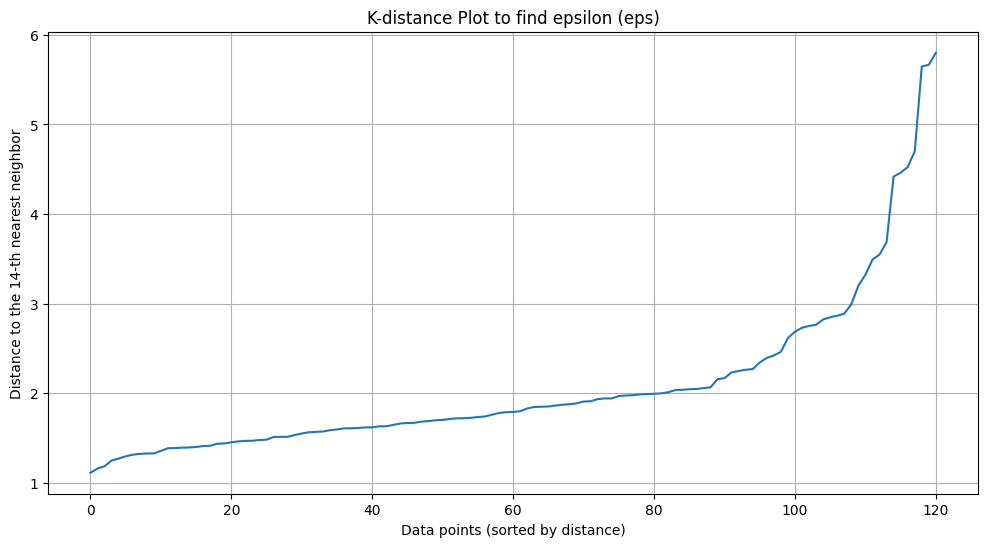

Observe the plot above to find the 'elbow' point. The y-coordinate of the elbow is a good candidate for the 'eps' parameter in DBSCAN.


In [5]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Identify standardized numeric features
# The list `numeric_cols_for_clustering` was created in the previous step and contains the names of the standardized numeric columns.
X = df[numeric_cols_for_clustering]

# Step 5: Choose min_samples. A common choice is 2 * dimensions of the data.
min_samples = 2 * X.shape[1]
print(f"Chosen min_samples: {min_samples}")

# Step 2: Calculate the distance to the k-nearest neighbors (k = min_samples)
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(X)
distances, indices = neigh.kneighbors(X)

# Step 3: Sort the distances in ascending order
# We are interested in the distance to the k-th nearest neighbor, which is the last column in the distances array after sorting.
distances = np.sort(distances[:, min_samples-1], axis=0)

# Step 4: Plot the sorted distances to find the elbow
plt.figure(figsize=(12, 6))
plt.plot(distances)
plt.xlabel("Data points (sorted by distance)")
plt.ylabel(f"Distance to the {min_samples}-th nearest neighbor")
plt.title("K-distance Plot to find epsilon (eps)")
plt.grid(True)
plt.show()

print("Observe the plot above to find the 'elbow' point. The y-coordinate of the elbow is a good candidate for the 'eps' parameter in DBSCAN.")

In [6]:
from sklearn.cluster import DBSCAN

# Step 2: Instantiate a DBSCAN object.
# Based on the k-distance plot from the previous step, an elbow appears around a distance of 0.8.
# Thus, we will set eps to 0.8.
# The min_samples value was determined in the previous step and stored in the min_samples variable.
dbscan = DBSCAN(eps=0.8, min_samples=min_samples)

# Step 3: Fit the DBSCAN model to the preprocessed data X.
dbscan.fit(X)

# Step 4: Store the cluster labels in a new column in the original DataFrame.
df['dbscan_labels'] = dbscan.labels_

# Display the head of the DataFrame with the new labels column
display(df.head())

# Also display the distribution of cluster labels to see the number of clusters and noise points
print("\nDistribution of DBSCAN cluster labels:")
display(df['dbscan_labels'].value_counts())

,hystologic_category_1NS_2NB_3GNB,INSS_Stage,INRG_risk_classification_0HR_1ILR,age_at_diagnosis_months,PFS_months,overall_survival_months,outcome_0DOD_1AICR_2AWD,MYCN_amplication,ferritin_ng/ml,Methylation_SFN_perce,Methylation_PCDHB_cluster_perce,dbscan_labels
0,1,4,0,0.339274,-0.096783,-0.133065,0,-0.663684,-0.704784,-0.756624,-1.851634,-1
1,2,4,0,-0.377920,-0.065236,0.736477,1,-0.663684,-0.652025,-4.165179,-1.845415,-1
2,2,4,0,0.224523,-0.065236,1.080830,1,-0.663684,-0.588715,-0.948901,-1.511705,-1
3,1,4,0,0.970405,0.358068,-0.100986,0,-0.663684,0.015370,0.627774,-1.441923,-1
4,1,4,0,0.454025,-0.065236,0.667492,1,-0.663684,-0.499026,-0.978034,-1.396323,-1



Distribution of DBSCAN cluster labels:


,count
dbscan_labels,
-1,121


In [7]:
from sklearn.metrics import silhouette_score

# 1. Get the unique cluster labels
unique_labels = df['dbscan_labels'].unique()
print(f"Unique cluster labels: {unique_labels}")

# 2. Print the number of clusters found (excluding noise label -1)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
print(f"Number of clusters found: {n_clusters}")

# 3. Print the number of noise points (data points with label -1)
n_noise = list(df['dbscan_labels']).count(-1)
print(f"Number of noise points: {n_noise}")

# 4. If there are more than one cluster (excluding noise), calculate the Silhouette Score
if n_clusters > 1:
    # The Silhouette Score is calculated for data points that are not noise
    # So, we filter out the noise points (-1) for the silhouette score calculation
    X_filtered = X[df['dbscan_labels'] != -1]
    labels_filtered = df[df['dbscan_labels'] != -1]['dbscan_labels']

    # Check if there are still multiple unique labels after filtering noise
    if len(np.unique(labels_filtered)) > 1:
        silhouette_avg = silhouette_score(X_filtered, labels_filtered)
        print(f"Silhouette Score: {silhouette_avg}")
    else:
        print("Silhouette Score cannot be calculated as only one cluster remains after removing noise.")
else:
    print("Silhouette Score cannot be calculated as there is only one cluster or all points are noise.")

Unique cluster labels: [-1]
Number of clusters found: 0
Number of noise points: 121
Silhouette Score cannot be calculated as there is only one cluster or all points are noise.


In [8]:
from sklearn.decomposition import PCA

# Step 2: Create a PCA object with 2 components
pca = PCA(n_components=2)

# Step 3: Apply PCA to the standardized data X
X_pca = pca.fit_transform(X)

# Step 4: Create a new DataFrame from the PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])

# Step 5: Add the 'dbscan_labels' column from the original DataFrame
df_pca['dbscan_labels'] = df['dbscan_labels']

display(df_pca.head())

,PCA1,PCA2,dbscan_labels
0,1.476475,-0.416067,-1
1,3.635609,-1.053141,-1
2,2.017193,-0.110147,-1
3,0.439923,0.698130,-1
4,1.699519,-0.016013,-1


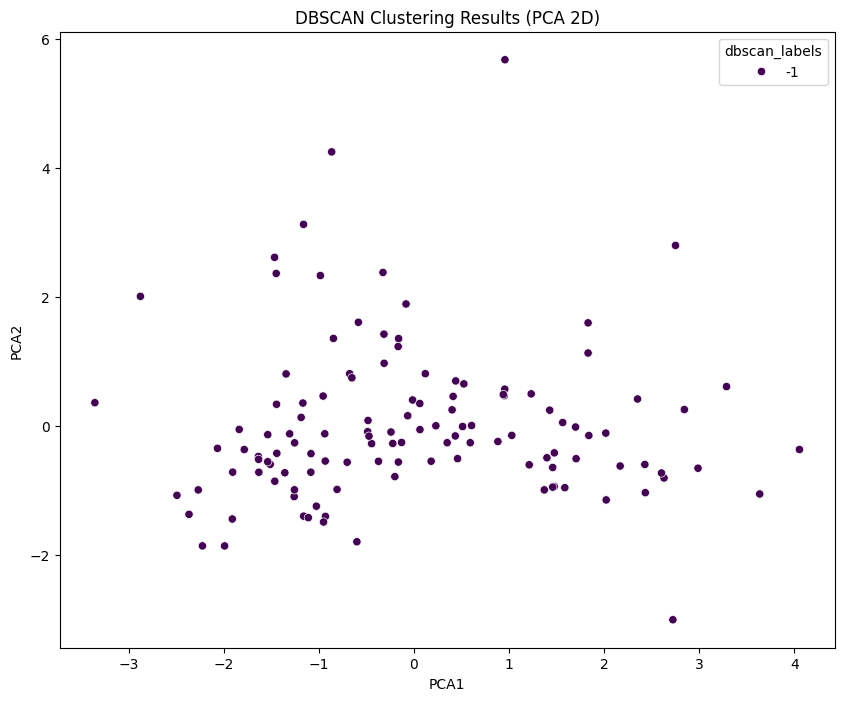

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 7: Create a scatter plot using seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='dbscan_labels', data=df_pca, legend='full', palette='viridis')

# Step 8: Add a descriptive title
plt.title("DBSCAN Clustering Results (PCA 2D)")

# Step 9: Display the plot
plt.show()